In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('BancoDeDados.csv')
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [4]:
def plot_percentual(x, df):
    plt.figure(figsize=(20, 8))

    img = sns.countplot(x=x, data=df, orient='h')
    img.set_ylabel('Contagem', fontsize=17)
    
    sizes = []

    for bar in img.patches:
        height = bar.get_height()
        sizes.append(height)
        img.text(bar.get_x() + bar.get_width() / 1.6, height + 200, '{:1.2f}%'.format(height / 116581 * 100),
                 ha='center', va='bottom', fontsize=12)
        
    img.set_ylim(0, max(sizes) * 1.1)

    return img

<Axes: xlabel='estado_cliente', ylabel='Contagem'>

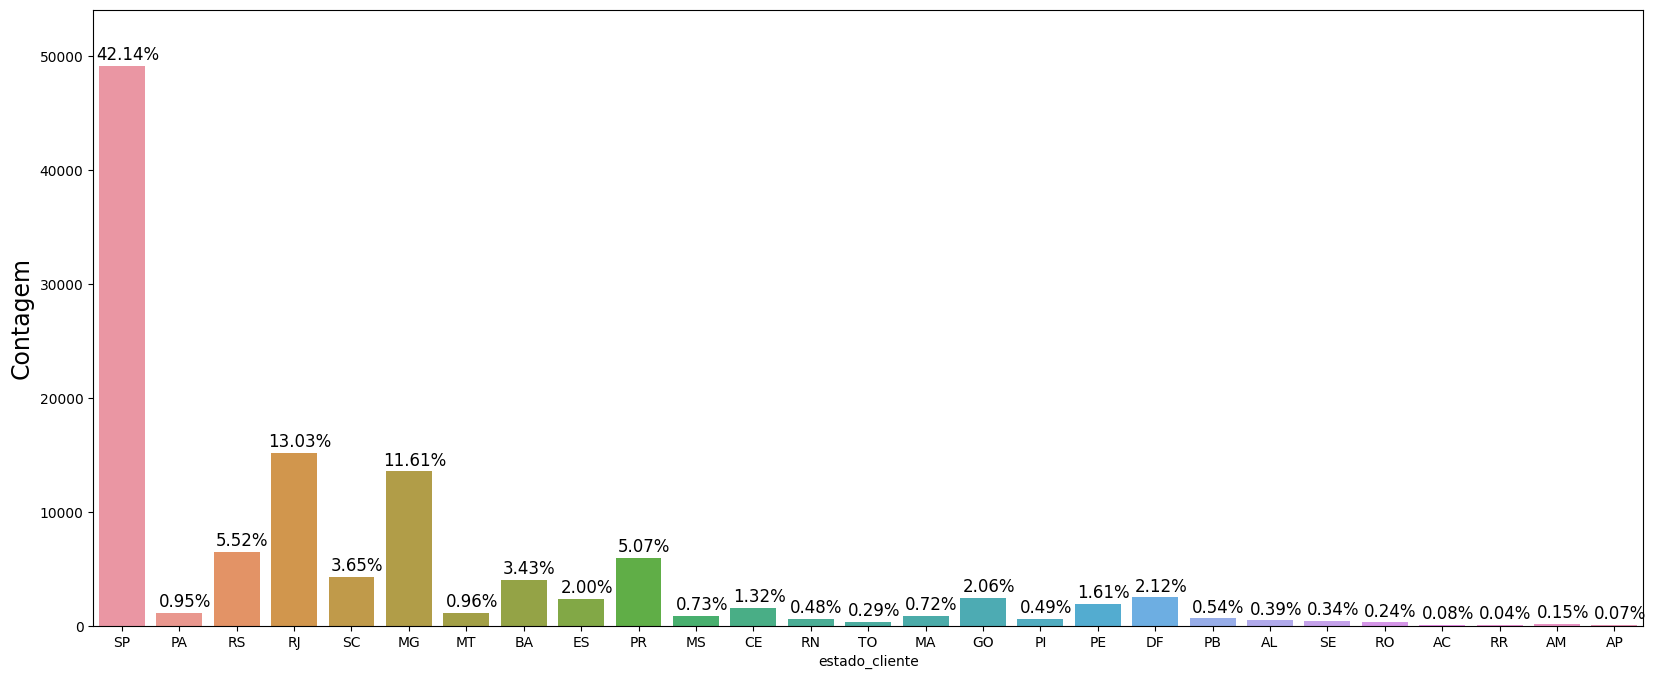

In [5]:
plot_percentual('estado_cliente', df)

<Axes: xlabel='estado_vendedor', ylabel='Contagem'>

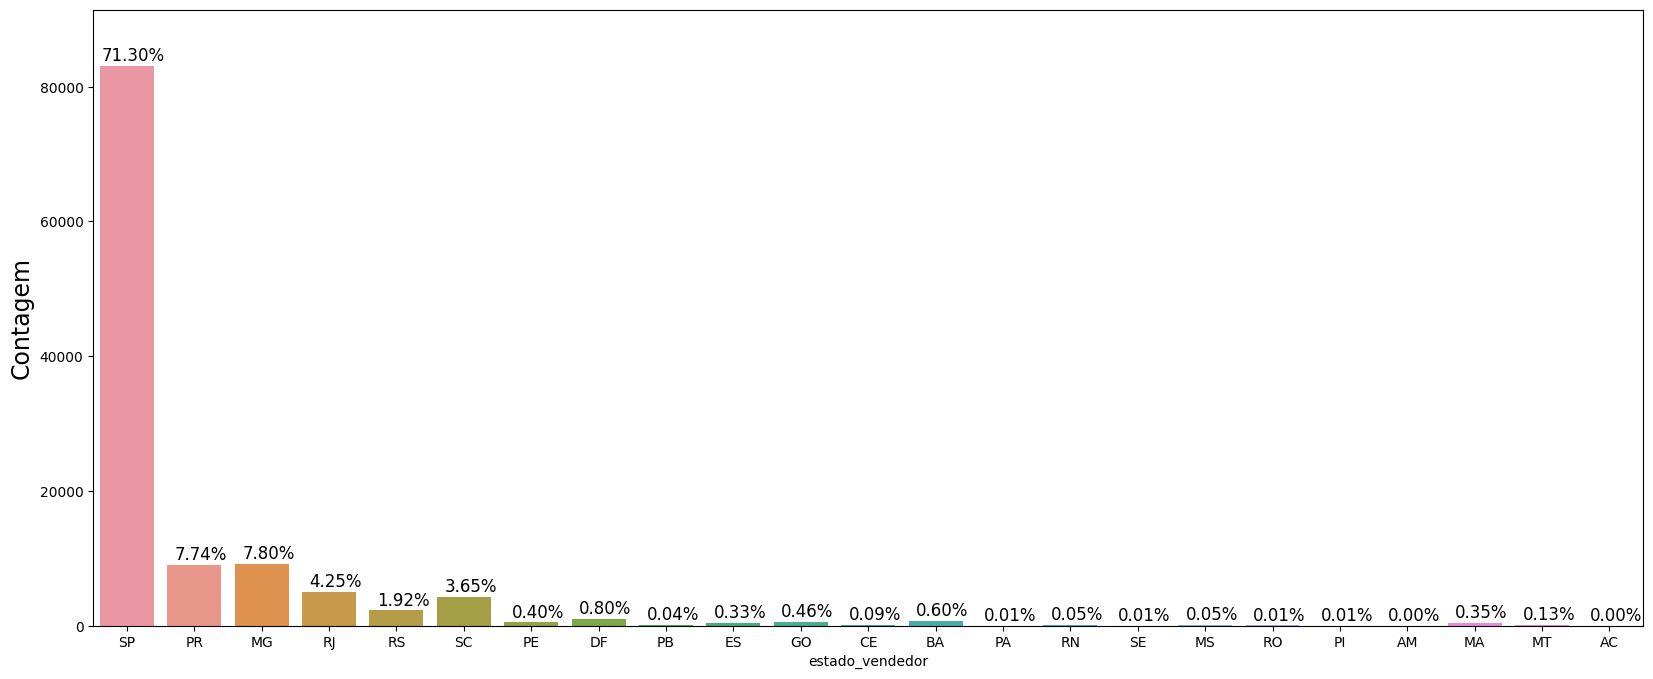

In [6]:
plot_percentual('estado_vendedor', df)

<Axes: xlabel='pagamento_tipo', ylabel='Contagem'>

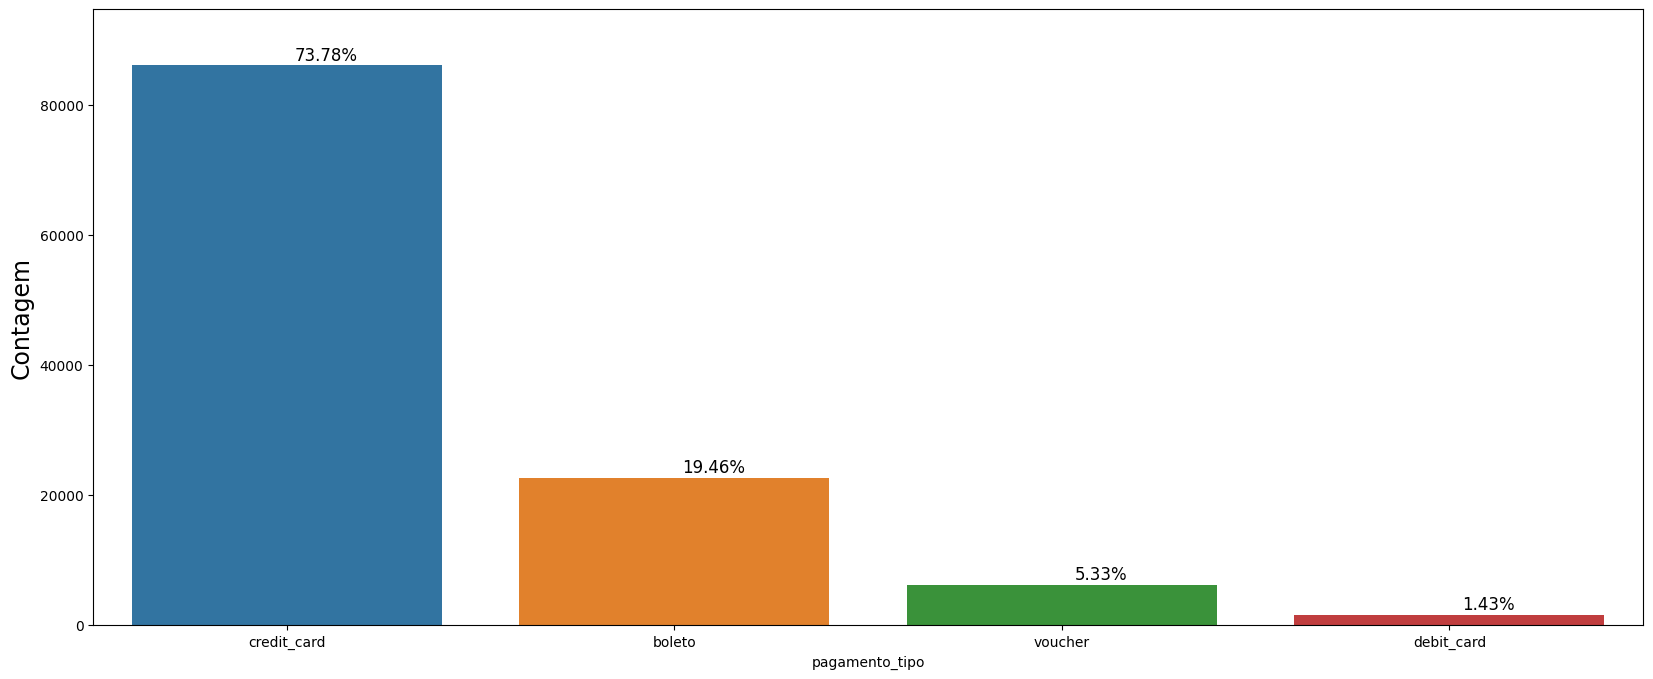

In [7]:
plot_percentual('pagamento_tipo', df)

# RFM:
* Recência
* Frequência
* Monetaridade

In [8]:
df_rfm = df[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']]
df_rfm.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


In [9]:
df_compras = df_rfm.groupby(['id_unico_cliente'])['horario_pedido'].max().reset_index()
df_compras.head()

,id_unico_cliente,horario_pedido
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [10]:
df_compras['horario_pedido'] = pd.to_datetime(df_compras['horario_pedido'])
df_compras.head()

,id_unico_cliente,horario_pedido
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [11]:
df_compras['recencia'] = (df_compras['horario_pedido'].max() - df_compras['horario_pedido']).dt.days
df_compras.head() 

,id_unico_cliente,horario_pedido,recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [12]:
df_usuario = pd.merge(df_rfm, df_compras[['id_unico_cliente', 'recencia']], on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


In [13]:
from sklearn.cluster import KMeans

In [14]:
def calcular_wcss(df, min_n_clusters, max_n_clusters):
    wcss = []

    for k in range(min_n_clusters, max_n_clusters):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X=df)
        df['clusters'] = kmeans.labels_
        wcss.append(kmeans.inertia_)

    return wcss

In [15]:
df_recencia = df_usuario[['recencia']]
df_recencia.head()

,recencia
0,474
1,298
2,298
3,483
4,211


In [16]:
min_n_clusters = 1
max_n_clusters = 10

soma_quadrados = calcular_wcss(df_recencia, min_n_clusters, max_n_clusters)
soma_quadrados

c:\Users\Predify\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Predify\AppData\Local\Temp\ipykernel_7624\2585819890.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.labels_
c:\Users\Predify\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=

[2733029504.943304,
 807902990.283308,
 362053130.0620575,
 213825503.7852644,
 135893495.8218442,
 96295069.76310872,
 69807068.57664132,
 55745539.89481239,
 44089529.37536293]

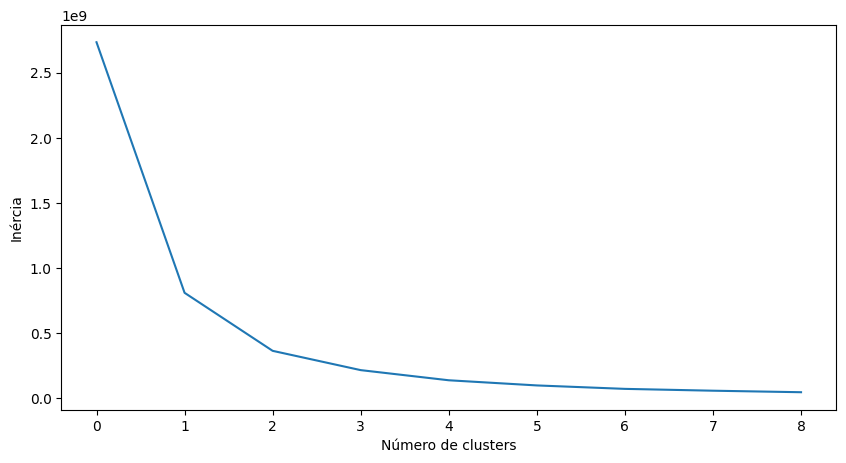

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(soma_quadrados)
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.show()

Cenário ideal: menor inércia possível para um número razoável de clusters

Melhor número de clusters: representado pelo ponto mais afastado da reta formada entre o primeiro e o último conjuntos

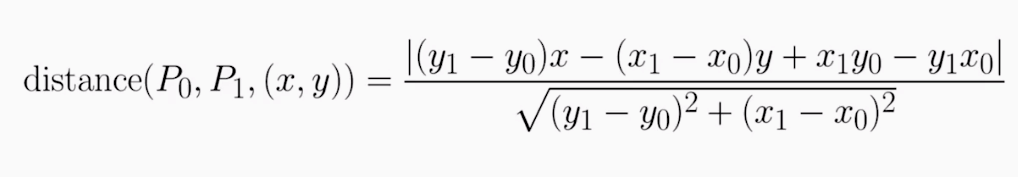

P0: primeiro conjunto
P1: último conjunto
(x, y): coordenadas de um ponto qualquer

In [18]:
def numero_otimo_clusters(wcss, min_n_clusters):
    x1, y1 = 2, wcss[0]
    x2, y2 = 10, wcss[len(wcss) - 1]

    distances = []

    for i in range(len(wcss)):
        x0, y0 = i + min_n_clusters, wcss[i]

        distance = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1) / np.sqrt((y2 - y1) ** 0.5 + (x2 - x1) ** 0.5)
        distances.append(distance)

    return distances.index(max(distances)) + min_n_clusters

In [19]:
n_clusters = numero_otimo_clusters(soma_quadrados, min_n_clusters)
n_clusters

3

In [20]:
kmeans = KMeans(n_clusters=n_clusters)

df_usuario['recencia_cluster'] = kmeans.fit_predict(df_recencia)
df_usuario.head()

c:\Users\Predify\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,2
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,0
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,0
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,2
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,0


In [21]:
def ordenar_clusters(cluster_nome, target_nome, crescente, df):
    df_agrupado_cluster = df.groupby([cluster_nome])[target_nome].mean().reset_index()

    # Cluster com menor recência devem receber melhor pontuação / índice do cluster
    df_agrupado_cluster_ordenado = df_agrupado_cluster.sort_values(by=target_nome, ascending=crescente).reset_index(drop=True)
    df_agrupado_cluster_ordenado['index'] = df_agrupado_cluster_ordenado.index + 1

    df_merge_clusters = pd.merge(df, df_agrupado_cluster_ordenado[[cluster_nome, 'index']], on=cluster_nome)

    df_merge_clusters_drop = df_merge_clusters.drop(columns=[cluster_nome], axis=1)
    df_merge_clusters_drop = df_merge_clusters_drop.rename(columns={'index': cluster_nome})

    return df_merge_clusters_drop

In [22]:
df_usuario = ordenar_clusters('recencia_cluster', 'recencia', False, df_usuario)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,1


In [23]:
df_usuario.groupby(['recencia_cluster'])['recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
recencia_cluster,,,,,,,,
1,27448.0,462.836454,69.627806,362.0,404.0,455.0,514.0,728.0
2,44046.0,259.929256,51.787041,176.0,215.0,263.0,297.0,361.0
3,45087.0,91.716171,49.579388,0.0,45.0,92.0,134.0,175.0


In [24]:
df_frequencia = df.groupby(['id_unico_cliente'])['pedido_aprovado'].count().reset_index()
df_frequencia.columns = ['id_unico_cliente', 'frequencia']
df_frequencia.head()

,id_unico_cliente,frequencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [25]:
df_usuario = pd.merge(df_usuario, df_frequencia, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster,frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,1,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,1,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,1,1


In [26]:
df_frequencia = df_usuario[['frequencia']]

In [27]:
kmeans = KMeans(n_clusters=n_clusters)

df_usuario['frequencia_cluster'] = kmeans.fit_predict(df_frequencia)
df_usuario.head()

c:\Users\Predify\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster,frequencia,frequencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,1,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,1,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,1,1,0


In [28]:
df_usuario = ordenar_clusters('frequencia_cluster', 'frequencia', True, df_usuario)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster,frequencia,frequencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,1,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,1,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,1,1,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,1,1,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,1,1,1


In [29]:
df_usuario.groupby(['frequencia_cluster'])['frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
frequencia_cluster,,,,,,,,
1,114750.0,1.570327,1.142482,0.0,1.0,1.0,2.0,8.0
2,1756.0,15.198178,6.870269,9.0,10.0,12.0,20.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


In [30]:
df_receita = df.groupby(['id_unico_cliente'])['pagamento_valor'].sum().reset_index()
df_receita.columns = ['id_unico_cliente', 'receita']
df_receita.head()

,id_unico_cliente,receita
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [31]:
df_usuario = pd.merge(df_usuario, df_receita, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster,frequencia,frequencia_cluster,receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,1,1,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,1,1,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,1,1,1,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,1,1,1,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,1,1,1,148.33


In [32]:
df_receita = df_usuario[['receita']]

In [33]:
kmeans = KMeans(n_clusters=n_clusters)

df_usuario['receita_cluster'] = kmeans.fit_predict(df_receita)
df_usuario.head()

c:\Users\Predify\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster,frequencia,frequencia_cluster,receita,receita_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,1,1,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,1,1,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,1,1,1,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,1,1,1,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,1,1,1,148.33,0


In [34]:
df_usuario = ordenar_clusters('receita_cluster', 'receita', True, df_usuario)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster,frequencia,frequencia_cluster,receita,receita_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,1,1,146.87,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,1,1,140.61,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,1,1,1,142.05,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,1,1,1,155.70,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,1,1,1,148.33,1


In [35]:
df_usuario.groupby(['receita_cluster'])['receita'].describe()

,count,mean,std,min,25%,50%,75%,max
receita_cluster,,,,,,,,
1,115929.0,297.274827,540.591084,9.59,70.34,134.04,278.33,6323.04
2,598.0,12583.481555,6282.891746,6512.28,7708.80,9759.75,16313.60,30186.00
3,54.0,53324.380741,23712.512949,36489.24,44048.00,45256.00,45256.00,109312.64


In [36]:
df_final = df_usuario[['id_unico_cliente', 'recencia', 'recencia_cluster', 'frequencia', 'frequencia_cluster', 'receita', 'receita_cluster']]
df_final.head()

,id_unico_cliente,recencia,recencia_cluster,frequencia,frequencia_cluster,receita,receita_cluster
0,861eff4711a542e4b93843c6dd7febb0,474,1,1,1,146.87,1
1,3c799d181c34d51f6d44bbbc563024db,483,1,1,1,140.61,1
2,567ab47ca4deb92d46dbf54dce07d0a7,528,1,1,1,142.05,1
3,f40ab89b622248b7ca125af4b486b887,474,1,1,1,155.70,1
4,749943913a9851a39c9baf51877fbab6,533,1,1,1,148.33,1


In [37]:
df_final['pontuacao'] = df_final['recencia_cluster'] + df_final['frequencia_cluster'] + df_final['receita_cluster']
df_final.head()

C:\Users\Predify\AppData\Local\Temp\ipykernel_7624\1262621631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pontuacao'] = df_final['recencia_cluster'] + df_final['frequencia_cluster'] + df_final['receita_cluster']


,id_unico_cliente,recencia,recencia_cluster,frequencia,frequencia_cluster,receita,receita_cluster,pontuacao
0,861eff4711a542e4b93843c6dd7febb0,474,1,1,1,146.87,1,3
1,3c799d181c34d51f6d44bbbc563024db,483,1,1,1,140.61,1,3
2,567ab47ca4deb92d46dbf54dce07d0a7,528,1,1,1,142.05,1,3
3,f40ab89b622248b7ca125af4b486b887,474,1,1,1,155.70,1,3
4,749943913a9851a39c9baf51877fbab6,533,1,1,1,148.33,1,3


In [38]:
df_final['pontuacao'].max()

7

In [39]:
df_final['segmento'] = 'Inativo'

df_final.loc[df_final['pontuacao'] >= 1, 'segmento'] = 'Business'
df_final.loc[df_final['pontuacao'] >= 3, 'segmento'] = 'Master'
df_final.loc[df_final['pontuacao'] >= 5, 'segmento'] = 'Premium'

df_final.head()

C:\Users\Predify\AppData\Local\Temp\ipykernel_7624\1854748016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['segmento'] = 'Inativo'


,id_unico_cliente,recencia,recencia_cluster,frequencia,frequencia_cluster,receita,receita_cluster,pontuacao,segmento
0,861eff4711a542e4b93843c6dd7febb0,474,1,1,1,146.87,1,3,Master
1,3c799d181c34d51f6d44bbbc563024db,483,1,1,1,140.61,1,3,Master
2,567ab47ca4deb92d46dbf54dce07d0a7,528,1,1,1,142.05,1,3,Master
3,f40ab89b622248b7ca125af4b486b887,474,1,1,1,155.70,1,3,Master
4,749943913a9851a39c9baf51877fbab6,533,1,1,1,148.33,1,3,Master


In [47]:
def plot_segmento(x, y, df):
    sns.set(palette='muted', color_codes=True, style='whitegrid')
    plt.figure(figsize=(7, 5))

    sns.scatterplot(x=x, y=y, hue='segmento', data=df, size='segmento', sizes=(50, 200),
                    size_order=['Premium', 'Master', 'Business', 'Inativo'])

    plt.show()

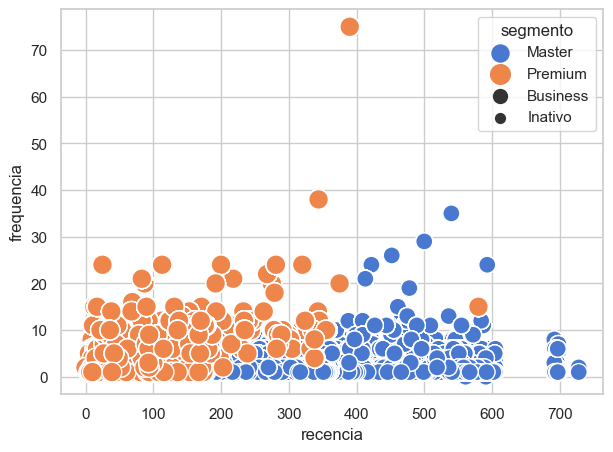

In [48]:
plot_segmento('recencia', 'frequencia', df_final)

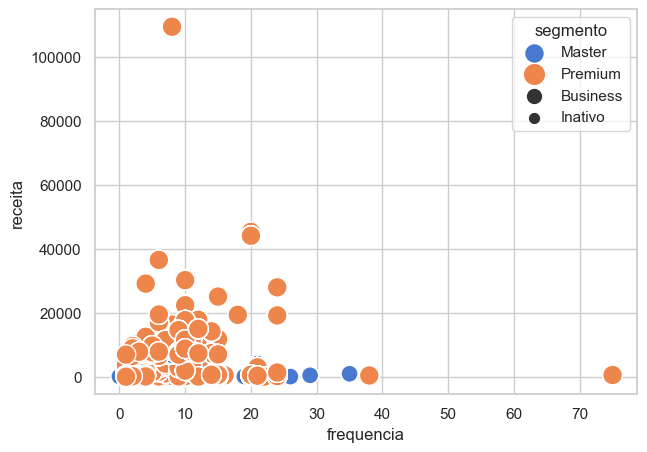

In [49]:
plot_segmento('frequencia', 'receita', df_final)

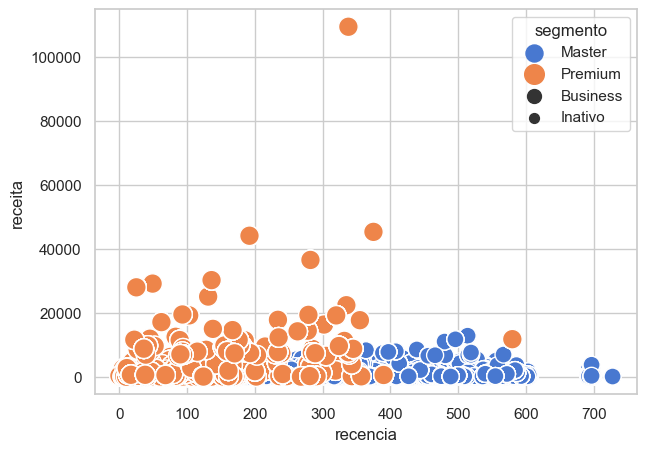

In [50]:
plot_segmento('recencia', 'receita', df_final)

<Axes: xlabel='segmento', ylabel='count'>

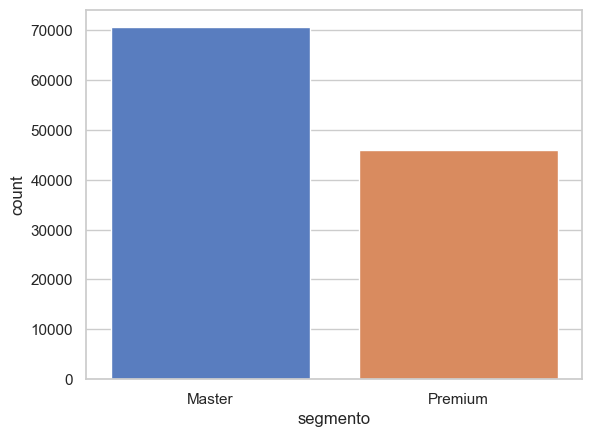

In [53]:
sns.countplot(x='segmento', data=df_final)